In [1]:
from src.n_forest import *
%matplotlib widget

In [4]:
fertility = 4.2
mortality_young = 0.01 # should be the quadratic function 
aging_rate = 1
biotic_pump_young = 1
mortality_old = 2
biotic_pump_old = 0
dist = 50
beta_2 = 1
P_0 = 1.05

arguments = (fertility, mortality_young, aging_rate,biotic_pump_young,mortality_old, biotic_pump_old, dist, beta_2, P_0)

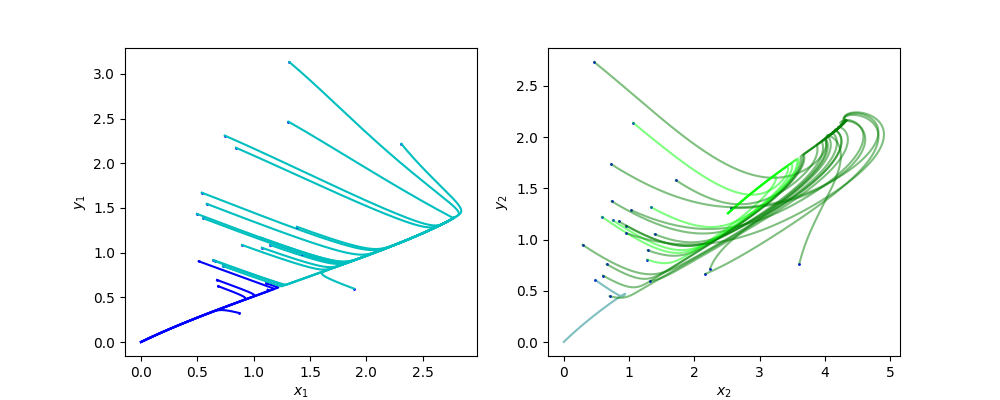

In [7]:
N = 25
np.random.seed(16)
init_x, init_y = [np.random.lognormal(0.0, 0.5, 2) for _ in range(N)], [np.random.lognormal(0.0, 0.5, 2) for _ in range(N)]

# init_x, init_y = [[2.63245325,np.random.uniform(0, 5)] for _ in range(N)], [[1.316, np.random.uniform(0, 5)] for _ in range(N)]

fig, [ax1, ax2] = plt.subplots(1,2,figsize=(10,4))
for n in range(N):
    ax1.plot(init_x[n][0], init_y[n][0], 'bo', ms=1)
    ax2.plot(init_x[n][1], init_y[n][1], 'bo', ms=1)
    xs, ys = system_n_forests(init_x[n], init_y[n], arguments, timesteps=800, dt = 0.01)

    if xs[0][-1] < 1:
        color1 = 'b'
    else:
        color1 = 'c'

    if xs[1][-1] < 1:
        color2 = 'teal'
    elif 1 < xs[1][-1] < 3 :
        color2 = 'lime'
    else:
        color2 = 'g'

    ax1.plot(xs[0], ys[0], color1)
    ax2.plot(xs[1], ys[1], color2, ms=1, alpha=0.5)

#watch out, this is computed in lower cells!
# grid = ax2.imshow(phase_grid, origin='lower', cmap='coolwarm_r')
# fig.colorbar(grid)
# plt.show()

ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$y_1$')
ax2.set_xlabel(r'$x_2$')
ax2.set_ylabel(r'$y_2$')
plt.show()

In [ ]:
x_eq = [2.63245325, 1.316]
steps = 50
grid_x, grid_y = np.meshgrid(np.linspace(0, 5, steps), np.linspace(0, 5, steps))
phase_grid = np.zeros((steps, steps))

fig, ax = plt.subplots()

for x in range(steps):
    for y in range(steps):
        # xs, ys = system_n_forests(np.random.uniform(0, 5, 2), [grid_x[x][y], grid_y[x][y]], arguments, timesteps=2000, dt = 0.01, dist=150)
        xs, ys = system_n_forests([1.5,1.0], [grid_x[x][y], grid_y[x][y]], arguments, timesteps=1500, dt = 0.01, dist=150)

        ax.plot(xs[1][-1], ys[1][-1], 'bo')
        # ax.plot(grid_x[x][y], grid_y[x][y], 'o')
        
        if xs[1][-1] < 1:
            value = 0
        elif 1<xs[1][-1] <3:
            value = 1
        else:
            value = 2
        phase_grid[x][y] = value

plt.show()

In [ ]:
fig, ax = plt.subplots()
grid = ax.imshow(phase_grid, origin='lower', cmap='coolwarm_r')
fig.colorbar(grid)
plt.show()

In [ ]:
fig, [ax1, ax2] = plt.subplots(1,2,figsize=(10,4))
init_x, init_y = [np.random.uniform(0,5,2) for _ in range(N)], [np.random.uniform(0,3,2) for _ in range(N)]
for n in range(N):
    x, y = system_n_forests(init_x[n], init_y[n], arguments, timesteps=500, dist=650)

    ax1.plot(x[0], y[0], 'b')
    ax2.plot(x[1], y[1], 'g')

ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$y_1$')
ax2.set_xlabel(r'$x_2$')
ax2.set_ylabel(r'$y_2$')
plt.show()

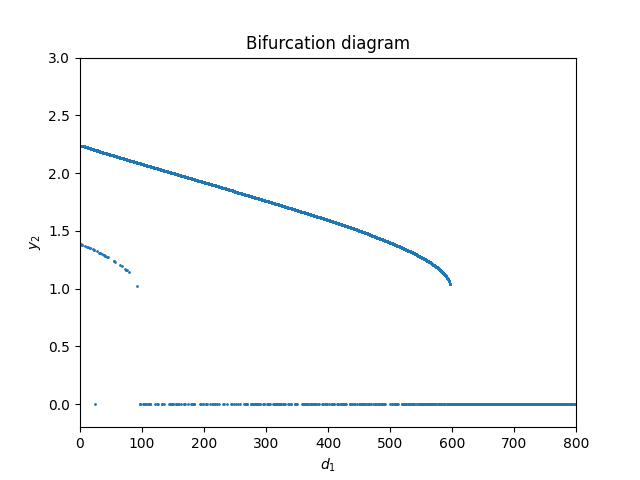

In [13]:
n = 500
r = np.linspace(1,800, n)

fig, ax = plt.subplots()

ds, y2s = [],[]
# x0, y0 = np.arange(0,5,5/n), np.arange(0,5,5/n)
for d in range(n):
    arguments = (fertility, mortality_young, aging_rate,biotic_pump_young,mortality_old, biotic_pump_old, r[d], beta_2, P_0)
    for i in range(10):
        # print(i)
        xs, ys = system_n_forests(np.random.uniform(0,5,2), np.random.uniform(0,5,2), arguments, timesteps=800, dt=0.1)
        y2s.append(ys[1][-1])
    ds.append(10*[r[d]]) 

ds=np.concatenate(ds)
# y2s=np.concatenate(y2s)

ax.plot(ds, y2s, 'o', ms=1)
ax.set_xlim(0,800)
ax.set_ylim(-0.2,3)
ax.set_xlabel(r'$d_1$')
ax.set_ylabel(r'$y_2$')
ax.set_title("Bifurcation diagram")
plt.show()

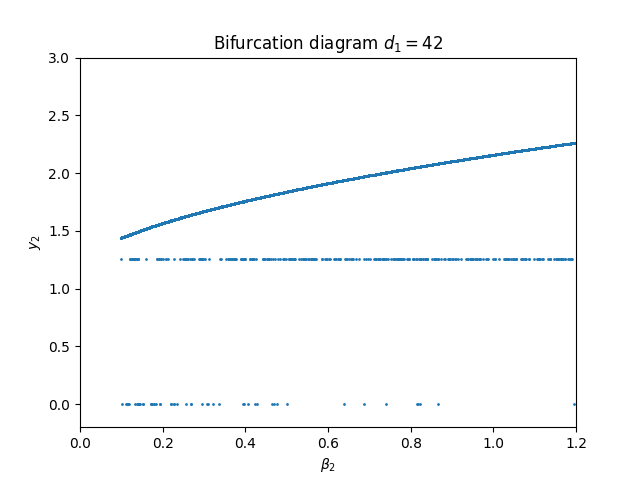

In [15]:
n = 500
beta_2 = np.linspace(0.1,1.2,n)

fig, ax = plt.subplots()

ds, y2s = [],[]
for b2 in range(n):
    arguments = (fertility, mortality_young, aging_rate,biotic_pump_young,mortality_old, biotic_pump_old, dist, beta_2[b2], P_0)
    for _ in range(10):
        xs, ys = system_n_forests(np.random.uniform(0,5,2), np.random.uniform(0,5,2), arguments, timesteps=500, dt=0.1, beta_2=beta_2[b2])
        y2s.append(ys[1][-1])
    ds.append(10*[beta_2[b2]])

ds=np.concatenate(ds)
# y2s=np.concatenate(y2s)

ax.plot(ds, y2s, 'o', ms=1)
ax.set_xlim(0,1.2)
ax.set_ylim(-0.2,3)
ax.set_xlabel(r'$\beta_2$')
ax.set_ylabel(r'$y_2$')
ax.set_title(r"Bifurcation diagram $d_1=42$")
plt.show()